## XOR Problem Using Multilayer Perceptron
***
Talk is cheap. Show me the code.

x:[0 0], predict:[5.88124165e-05]
x:[0 1], predict:[0.9930144]
x:[1 0], predict:[0.99309726]
x:[1 1], predict:[9.49490553e-05]


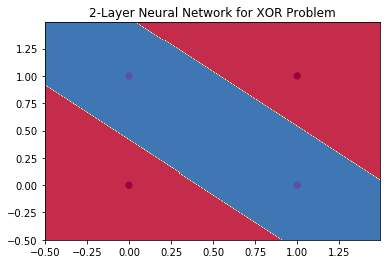

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1.0 - y ** 2

def relu(y):
    tmp = y.copy()
    tmp[tmp < 0] = 0
    return tmp

def drelu(x):
    tmp = x.copy()
    tmp[tmp >= 0] = 1
    tmp[tmp < 0] = 0
    return tmp

class MLPClassifier(object):
    """Multilayer perceptron using backpropagation algorithm"""
    # Reference: https://www.jianshu.com/p/e04132c104dd

    def __init__(self,
                 layers,
                 activation='tanh',
                 epochs=20, batch_size=1, learning_rate=0.01):
        """
        :param layers: [input -> hidden -> ... -> output]
        :param activation: activation function
        :param epochs: iterations
        :param learning_rate: learning rate 
        """
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.layers = []
        self.weights = []
        self.batch_size = batch_size

        for i in range(0, len(layers) - 1):
            weight = np.random.random((layers[i], layers[i + 1]))
            layer = np.ones(layers[i])
            self.layers.append(layer)
            self.weights.append(weight)
        self.layers.append(np.ones(layers[-1]))

        self.thresholds = []
        for i in range(1, len(layers)):
            threshold = np.random.random(layers[i])
            self.thresholds.append(threshold)

        if activation == 'tanh':
            self.activation = tanh
            self.dactivation = dtanh
        elif activation == 'sigomid':
            self.activation = sigmoid
            self.dactivation = dsigmoid
        elif activation == 'relu':
            self.activation = relu
            self.dactivation = drelu

    def fit(self, X, y):
        """
        :param X_: shape = [n_samples, n_features] 
        :param y: shape = [n_samples] 
        :return: self
        """
        for _ in range(self.epochs * (X.shape[0] // self.batch_size)):
            i = np.random.choice(X.shape[0], self.batch_size)
            # i = np.random.randint(X.shape[0])
            self.update(X[i])
            self.back_propagate(y[i])

    def predict(self, X):
        """
        :param X: shape = [n_samples, n_features] 
        :return: shape = [n_samples]
        """
        self.update(X)
        return self.layers[-1].copy()

    def update(self, inputs):
        self.layers[0] = inputs
        for i in range(len(self.weights)):
            next_layer_in = self.layers[i] @ self.weights[i] - self.thresholds[i]
            self.layers[i + 1] = self.activation(next_layer_in)

    def back_propagate(self, y):
        errors = y - self.layers[-1]
        gradients = [(self.dactivation(self.layers[-1]) * errors).sum(axis=0)]

        self.thresholds[-1] -= self.learning_rate * gradients[-1]
        for i in range(len(self.weights) - 1, 0, -1):
            tmp = np.sum(gradients[-1] @ self.weights[i].T * self.dactivation(self.layers[i]), axis=0)
            gradients.append(tmp)
            self.thresholds[i - 1] -= self.learning_rate * gradients[-1] / self.batch_size
        gradients.reverse()
        for i in range(len(self.weights)):
            tmp = np.mean(self.layers[i], axis=0)
            self.weights[i] += self.learning_rate * tmp.reshape((-1, 1)) * gradients[i]

def plot_decision_boundary(pred_func, X, y, title=None):
    """plot the decision boundary
    :param pred_func: predict function
    :param X: Training data X
    :param y: Training label Y
    :return: None
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)

    if title:
        plt.title(title)
    plt.show()



if __name__ == '__main__':
    
    nn = MLPClassifier([2,2,2,1], activation='tanh', epochs = 10000, learning_rate = 0.1)
    
    # Training data
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    
    y = np.array([0, 1, 1, 0])
    
    # 
    np.random.seed(0)
    
    # Training
    nn.fit(X, y)
    
    # classify
    for xj in X:
        y_pred = nn.predict(xj)
        print('x:{}, predict:{}'.format(xj, y_pred))
        
    def predict_func(X):
        sign = np.vectorize(lambda x: 1 if x >= 0.5 else 0)
        ans = sign(nn.predict(X))
        return ans
    
    # Display figure in the jupyter
    %matplotlib inline
    
    # plot the decision boundary
    plot_decision_boundary(predict_func, X, y, '2-Layer Neural Network for XOR Problem')
        
